## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
treat_old = df[(df.group == 'treatment') & (df.landing_page == 'old_page')]
control_new = df[(df.group == 'control') & (df.landing_page == 'new_page')]
nolineup = treat_old.shape[0] + control_new.shape[0]
nolineup

3893

Alternatively, we can execute the following cells.

In [7]:
pd.crosstab(df.group, df.landing_page, margins=True)

landing_page,new_page,old_page,All
group,,,
control,1928,145274,147202
treatment,145311,1965,147276
All,147239,147239,294478


We see that

- there are 1965 entries where treatment was associated with old_page, and
- 1928 entries where new_page was associated with control

So, the number of times new_page and treatment don't line up is 1928 + 1965 = 3893.

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Alternatively -

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No null or missing values!

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. Figure out how we should handle these rows.  

a. Create a new dataset accordingly.  Store your new dataframe in **df2**.

In [10]:
# Creating new df using only the conditions 'treatment + new_page' and 'control + old_page'
df2 = df[((df['group']=='treatment') & (df['landing_page']=='new_page')) | ((df['group']=='control') & (df['landing_page']=='old_page'))]

We could have used 'pandas' functions 'append' and 'drop' to subtract mismatched records from the df.

In [11]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` 

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop_duplicates(subset='user_id')

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


Since there are 290584 rows (and not 290585), this means that duplicates have been removed.

`4.` 

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2[df2['group'] == 'control']['converted'].mean()
# Or use
# df2.query('group =="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# df2[df2['group'] == 'treatment']['converted'].mean()
# Or use
df2.query('group =="treatment"').converted.mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

By definition of mean, it is length of subset of df where landing_page = 'new_page' divided by length of the df.

So, len(df2[df2['landing_page'] == 'new_page'])/len(df2)

But we will use the in-built 'mean' function.

In [20]:
(df2['landing_page'] == 'new_page').mean()

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:** The control group has higher conversion rate (0.1204) than the treatment group (0.1188). These are not significantly different. So, we do not have a strong evidence if one page leads to more conversions than the other.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:** Hypothesis:

$$H_0: p_{old}\ge p_{new}$$$$H_1: p_{old}\lt p_{new}$$

Alternatively, our Hypothesis can be:

$$H_0: p_{new} - p_{old} \le 0$$$$H_1: p_{new} - p_{old} \gt 0$$

where $p_{new}$ & $p_{old}$ are the population mean values for new_page and old_page, respectively.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
p_new = df2.converted.mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2.converted.mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17429

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17664

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
(new_page_converted/n_new) - (old_page_converted/n_old)

-0.0016481812403411206

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs = []

for _ in range(10000):
    new_converted_simulation = np.random.binomial(n_new,p_new)/n_new
    old_converted_simulation = np.random.binomial(n_old,p_old)/n_old
    diff = new_converted_simulation - old_converted_simulation 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

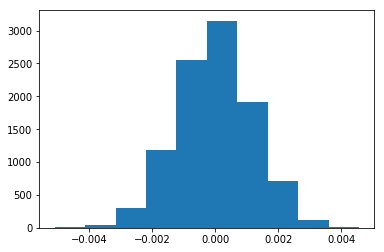

In [29]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# Difference observed
diff = df.query('group =="treatment"').converted.mean() - df.query('group =="control"').converted.mean()

# Calculate the propotion of the p_diffs greater than the difference observed
(p_diffs > diff).mean()

0.89000000000000001

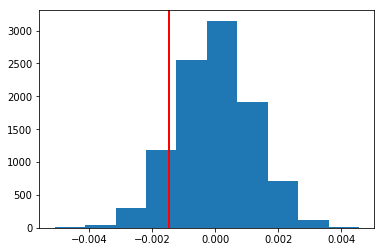

In [31]:
plt.hist(p_diffs);
plt.axvline(diff, c='r', linewidth = 2);

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** The value calculated in part j is called p-value of observing the statistic given that Null is true. As the p-value (0.8900) is large, we have failed to reject the Null hypothesis and should keep the old page.

This value is far greater than the typical $\alpha$ of 0.05 in business studies (an $\alpha$ level of 0.05 indicates that we have a 5% chance of committing a Type I error if the Null is true.) So, we have failed to reject the Null and conclude that there isn't sufficient evidence to say that there is a difference between the two values.

l. We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let n_old and n_new refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1')['converted'].count()
convert_new = df2.query('group == "treatment" & converted == 1')['converted'].count()
n_old = df2.query("group == 'control'").count()[0]
n_new = df2.query("group == 'treatment'").count()[0]
convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

(1.3116075339133115, 0.18965258971881804)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Interpreting z-score - 

In [34]:
# Significance of z-score
from scipy.stats import norm
norm.cdf(z_score)

0.90517370514059103

In [35]:
# Critical value at 95% confidence
norm.ppf(1-(0.05/2))

1.959963984540054

**Answer:** The p-value (0.8900) computed in part j, is different from the p-value (0.1897) calculated by the z-test method. This is because we considered  p_old  and  p_new  to be equal from the beginning, which is not the case in z-test.

However, since the z-score (1.312) is less than our critical value at 95% confidence (1.9600), we have failed to reject the Null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we will show that the result we achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** Logistic Regression

b. The goal is to use **statsmodels** to fit the logistic regression model to see if there is a significant difference in conversion based on which page a customer receives. However, we first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [37]:
# Intercept column for df2
df2['intercept'] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
# Assign appropriate values to ab_page column
def label_abpage(row):
   if row['group'] == "control" :
      return 0
   elif row['group'] == "treatment" :
      return 1

In [39]:
# ab_page column for df2
df2['ab_page'] = df2.apply(lambda row: label_abpage(row), axis = 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [41]:
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2) 
# https://github.com/statsmodels/statsmodels/issues/3931

lm = sm.Logit(df2['ab_page'], df2[['converted','intercept']])
lm_fit = lm.fit()

Optimization terminated successfully.
         Current function value: 0.693144
         Iterations 3


d. Provide the summary of your model below.

In [42]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ab_page   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 May 2020   Pseudo R-squ.:               4.271e-06
Time:                        06:46:53   Log-Likelihood:            -2.0142e+05
converged:                       True   LL-Null:                   -2.0142e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
converted     -0.0150      0.011     -1.312      0.190      -0.037       0.007
intercept      0.0020      0.004      0.518      0.604      -0.006       0.010
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

In [43]:
np.exp(lm_fit.params)

converted    0.985115
intercept    1.002050
dtype: float64

**Answer:** The odds of conversion is 0.985115 ~1. This means that the probability of someone converting is almost equal to the probability of him not converting to the new page.

The p-value (0.1897) computed by the logistic regression is same as the one calculated by the z-test function in part m, part II. And, both of these p-values are different from the one calculated in part j, part II. This is because we considered p_old and p_new to be equal from the beginning, which is not the case in z-test and the logistic regression model.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** Considering other factors is a good idea as they may help us make clearer decision on choosing old page vs new page. 

One of the disadvantages of adding additional terms into the regression model is Simpson's paradox where the combined impact of different variables reverses when these variables are combined.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. We will need to read in the **countries.csv** dataset and merge together our datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Create dummy variables for these country columns - **Hint: Need two columns for the three dummy variables.** 

In [44]:
df_new = pd.read_csv('./countries.csv')
df_new.groupby('country').count()

,user_id
country,
CA,14499
UK,72466
US,203619


In [45]:
df_new = df2.merge(df_new)
# Alternatively -
# df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [46]:
# Conversion rate by country
df_new.query('country == "US"').converted.mean(), df_new.query('country == "UK"').converted.mean(), df_new.query('country == "CA"').converted.mean()

(0.11954621353501621, 0.12059448568984076, 0.11531829781364232)

In [47]:
df_new.groupby('country').mean()

,user_id,converted,intercept,ab_page
country,,,,
CA,788640.270639,0.115318,1.0,0.503552
UK,787678.848246,0.120594,1.0,0.498247
US,788075.589053,0.119546,1.0,0.500462


In [48]:
# Create required dummy variables
df_new1 = pd.get_dummies(df_new['country'])
df_new1.head()

,CA,UK,US
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [49]:
df_new = df_new.join(df_new1)
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


h. Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
# Logistic Regression
lm = sm.Logit(df_new['ab_page'], df_new[['converted','CA','UK','US','intercept']])
lm_fit = lm.fit()
lm_fit.summary()

Optimization terminated successfully.
         Current function value: 0.693141
         Iterations 11


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ab_page   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 May 2020   Pseudo R-squ.:               8.690e-06
Time:                        06:49:01   Log-Likelihood:            -2.0142e+05
converged:                       True   LL-Null:                   -2.0142e+05
                                        LLR p-value:                    0.3207
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
converted     -0.0150      0.011     -1.308      0.191      -0.037       0.007
CA             0.0123        nan        nan        nan         nan         nan
UK            -0.0088        nan        nan        nan         nan         nan
US          4.466e-05        nan        nan        nan         nan         nan
intercept      0.0036        nan        nan        nan         nan         nan
==============================================================================
"""

In [51]:
np.exp(lm_fit.params)

converted    0.985160
CA           1.012420
UK           0.991242
US           1.000045
intercept    1.003596
dtype: float64

The odds of conversion for all 3 countries is almost equal to 1, which means that the probabilities of someone converting from any of the 3 given countries is equal. Thus, countries do not have an impact on the conversion rate.

We have, yet again, failed to reject our Null hypothesis, even after taking user location (country) into consideration.

## Recommendation: Keep the old page for the e-commerce website as there is no statistical evidence that the new page is better.

<a id='conclusions'></a>

> Create .html or .pdf version of this notebook in the workspace. 


In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0